<>:45: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:52: SyntaxWarning: invalid escape sequence '\l'
<>:66: SyntaxWarning: invalid escape sequence '\o'
<>:45: SyntaxWarning: invalid escape sequence '\l'
<>:46: SyntaxWarning: invalid escape sequence '\l'
<>:51: SyntaxWarning: invalid escape sequence '\l'
<>:52: SyntaxWarning: invalid escape sequence '\l'
<>:66: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_417461/3724806452.py:45: SyntaxWarning: invalid escape sequence '\l'
  ln_z_line1, = ax1.plot(x, ln_z1, 'b-', label='$\ln(z)$')
/tmp/ipykernel_417461/3724806452.py:46: SyntaxWarning: invalid escape sequence '\l'
  ln_p_line1, = ax1.plot(x, ln_p1, 'g-', label='$\ln(p)$')
/tmp/ipykernel_417461/3724806452.py:51: SyntaxWarning: invalid escape sequence '\l'
  ln_z_line2, = ax2.plot(x, ln_z2, 'b-', label='$\ln(z)$')
/tmp/ipykernel_417461/3724806452.py:52: SyntaxWarning: invali

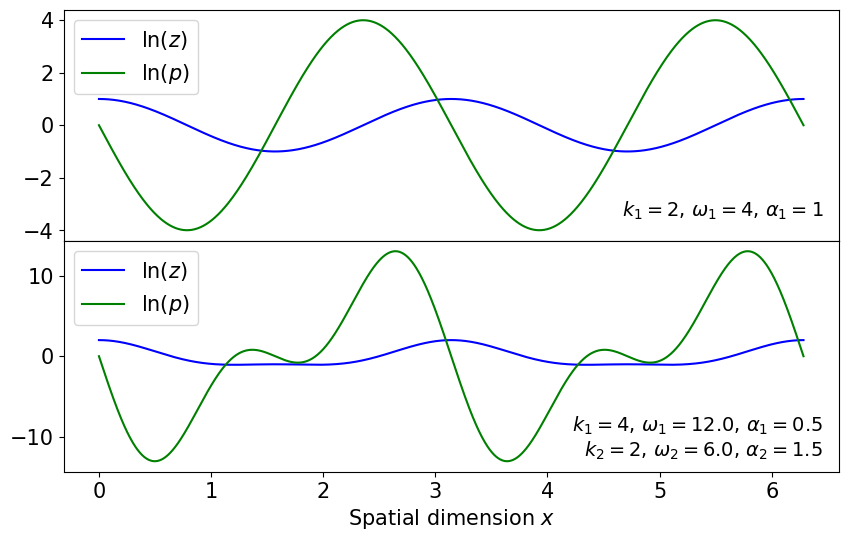

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for both subplots
c = 2  # Wave speed
m = 1.0
t_init = 0.0
x = np.linspace(0, 2*np.pi, 1000)

# Parameters for first subplot (original values)
k_values1 = [2]
alpha_values1 = [1]
omega_values1 = [k * c for k in k_values1]

# Parameters for second subplot (different values)
k_values2 = [4, 2]
alpha_values2 = [0.5, 1.5]
omega_values2 = [k * (c*1.5) for k in k_values2]

# Create figure with two subplots sharing x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
plt.subplots_adjust(hspace=0)  # No space between subplots

# Calculation functions
def calculate_ln_z(x_values, t, k_list, omega_list, alpha_list):
    result = np.zeros_like(x_values)
    for k, omega, alpha in zip(k_list, omega_list, alpha_list):
        result += alpha * np.cos(k * x_values - omega * t)
    return result

def calculate_ln_p(x_values, t, k_list, omega_list, alpha_list, m_param):
    result = np.zeros_like(x_values)
    for k, omega, alpha in zip(k_list, omega_list, alpha_list):
        result += -m_param * alpha * omega * np.sin(k * x_values - omega * t)
    return result

# Initial calculations for both subplots
ln_z1 = calculate_ln_z(x, t_init, k_values1, omega_values1, alpha_values1)
ln_p1 = calculate_ln_p(x, t_init, k_values1, omega_values1, alpha_values1, m)

ln_z2 = calculate_ln_z(x, t_init, k_values2, omega_values2, alpha_values2)
ln_p2 = calculate_ln_p(x, t_init, k_values2, omega_values2, alpha_values2, m)

# Plot both subplots with original colors
ln_z_line1, = ax1.plot(x, ln_z1, 'b-', label='$\ln(z)$')
ln_p_line1, = ax1.plot(x, ln_p1, 'g-', label='$\ln(p)$')
ax1.legend(fontsize=15, loc='upper left')
ax1.tick_params(axis='both', which='major', labelsize=15)


ln_z_line2, = ax2.plot(x, ln_z2, 'b-', label='$\ln(z)$')
ln_p_line2, = ax2.plot(x, ln_p2, 'g-', label='$\ln(p)$')
ax2.legend(fontsize=15, loc='upper left')
ax2.set_xlabel('Spatial dimension $x$', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)


# Remove grids
for ax in [ax1, ax2]:
    ax.grid(False)

# Format parameter strings without brackets and with LaTeX
def format_params(k, omega, alpha):
    params = []
    for i, (kn, wn, an) in enumerate(zip(k, omega, alpha)):
        params.append(f"$k_{i+1} = {kn}$, $\omega_{i+1} = {wn}$, $\\alpha_{i+1} = {an}$")
    return "\n".join(params)

# # Add text boxes with formatted parameters
# props = dict(boxstyle='round', facecolor='white', alpha=0.8, pad=0.3)

# Top plot parameters
param_text1 = format_params(k_values1, omega_values1, alpha_values1)
ax1.text(0.98, 0.18, param_text1, transform=ax1.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right')#, bbox=props)

# Bottom plot parameters
param_text2 = format_params(k_values2, omega_values2, alpha_values2)
ax2.text(0.98, 0.25, param_text2, transform=ax2.transAxes, fontsize=14,
        verticalalignment='top', horizontalalignment='right')#, bbox=props)

plt.savefig('spatial_evolution_comparison.pdf', dpi=300, bbox_inches='tight')
plt.show()